<a href="https://colab.research.google.com/github/Nikkuchan/AIML-Problem-Sets/blob/main/58089_MEX_Wagler/58089_MEX_Wagler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Problem Set
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$

# Problem 1
## 1.1 Lecture Requirement

Obtain a dataset of your liking from a data source. Explain the purpose of the dataset and mention any publication if it is obtained from the source. Provide a needs statement and significance for the dataset.



## 1.2 Lab Requirement

Perform data exploration, data cleaning, and data visualization. The dataset should contain targets either for regression or classification. Provide the correlation and measures of error and variability of the dataset.

# Probem 2
## 2.1 Lecture Requirement

Identify an algorithm or method in performing a machine learning activity with the dataset you have chosen. Mention any papers, publications, or white papers about the properties, use, and theory behind the method. Provide an explanation of equations representing the algorithm.



>The given dataset **"Customer Personality Analysis"** aims to give a detailed analysis of a company’s ideal customers. The full dataset chosen by the group contains multiple features ideal for letting the companies gain better insights and understanding of different kinds customers. This would make it easier for them to do modification on their products depending on the needs, concerns, and behaviors of their customers. The dataset contains multiple features with over two thousand of records. **Simple linear regression, multiple linear regression, and aprori algorith** are only some of the machine learning algorithms that can be used with this kind of dataset.

Since the group decided to only focus on predicting the amount of money that customers are willing to spend for wine, the algorithm to be used in this activity will be Simple Linear Regression. 

**Simple Linear Regression**
> Simple Linear Regression deals with studying the relationship between one independent variable of x to a singe dependent variable y.
$$y = \omega_0 + \omega_1 X \\ _{\text{Eq. 1}}$$

Where $\omega_0$ is the intercept and $\omega_1$ is the slope. 
It is the same formula used in slope-intercept form $y = mx + b$. 

>In Eq. 1, the intercept $\omega_0$ is the positioning of the regression. Meanwhile, the slope  $\omega_1$ is for quantifying the association between variables $X$ and $Y$. In Simple Linear Regression, we base on a straight line to figure out the relationship between the dependent and independent variable and this said line is characterized by the obtained values from intercept and slope. 

Obtaining a negative slope indicates that there is a negative association between variabes $X$ and $Y$. If the sope is positive, the association is positive. Having 0 value indicates that there is no relationship between the two while obtaining a higher positive value for slope would just mean that the association between the two is strong. 

[nicole ref] Shrikant I. Bangdiwala (2018) Regression: simple linear, International Journal of Injury Control and Safety Promotion, 25:1, 113-115, DOI: 10.1080/17457300.2018.1426702


## 2.2 Lab Requirement

Present your solution implementing your algorithm of choice. You may use any library or package in this section. However, you are required to observe the following:

* Enforce object-oriented programming by implementing at least two of the pillars of OOP in the entirety of the solution.
* Dedicated functions for training, predicting, and evaluating the solution.
* A DataFrame of the metrics of the solution
* A visualization of the solution’s results.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

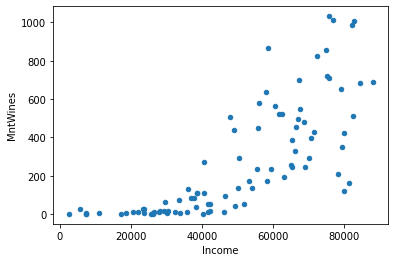

In [ ]:
market_X.plot.scatter("Income", "MntWines")

In [60]:
class LinearRegression_Simple():
 
  ## Coding covariances
  def covariance(self,vectA,vectB):
    covariance = np.round(np.cov(vectA,vectB),2)
    return covariance[0,1]

  ## Coding Pearsons Correlation
  def pearsons_r(self,vectA,vectB):
    R = np.round(np.corrcoef(vectA,vectB)[0,1],3)
    return R
  
  def train(self,X,y):
    std_X, std_y = np.std(X), np.std(y)     # compute for the std.dev of X and y
    rho = np.corrcoef(X,y)[0,1]             # compute for Pearson's R
    w1 = rho*(std_y/std_X)                  # compute for the weights of the bias term
    w0 = y.mean()-w1*X.mean()               # compute for the weights of the feature
    rndwt = np.round((w1,w0),2)
    self.model_ = rndwt
    return rndwt

  # passing the train method to model_ method
  def __init__(self):
    self.model_ = 0

  ## Getting the Predicted Value  
  def predict(self,x):
    std_X, std_y = np.std(X), np.std(y) # compute for the std.dev of X and y
    rho = np.corrcoef(X,y)[0,1]         # compute for Pearson's R
    w1 = rho*(std_y/std_X)              # compute for the weights of the bias term
    w0 = y.mean()-w1*X.mean()           # compute for the weights of the feature
    preds = np.round(np.array(w0+w1*x),2)
    return preds.reshape(-1,1)

  def evaluate(self):
    n = y.size
    n_X = X.size
    k = 1
    y_hat = self.predict(X).reshape(1,n_X)
    sst = np.sum(np.square(y-y.mean()))     #Sum of Squares Total
    ssr = np.sum(np.square(y_hat-y.mean())) #Sum of Squares Regression
    sse = np.sum(np.square(y_hat-y))        #Sum of Squares Error
    mse = np.mean(np.square(y_hat-y))       #Mean of Squared Error
    rmse = np.sqrt(mse)                     #Root Mean Squared Error
    r2 = (1-(sse/sst))                      #R-squared
    ar2 = (1-((1-r2)*(n-1)/(n-k-1)))        #Adjusted R-squared
    dictionary = {'Sum of Squares Total      [SST] ': [sst],
                  'Sum of Squares Regression [SSR] ': [ssr],
                  'Sum of Squares Error      [SSE] ': [sse],
                  'Mean of Squared Error     [MSE] ': [mse],
                  'Root Mean Squared Error   [RMSE]': [rmse],
                  'R-squared                 [R²]  ': [r2],
                  'Adjusted R-squared        [AR²] ': [ar2]}
    return dictionary
  def visualize(self):    
   std_X = np.std(X)
   std_y = np.std(y)
   rho = np.corrcoef(X,y)[0,1]
   w1 = rho*(std_y/std_X)
   w0 = y.mean() - w1*X.mean()
   model_ = w0 + w1*X
   plt.figure(figsize=(5,5), dpi=400)
   plt.grid()
   plt.scatter(X,y)
   plt.plot(X, model_)
   plt.savefig("Linear Regression.jpg")
   plt.show()

In [61]:
X1 = pd.read_csv("/content/Salary_Data.csv")
y = X1['Salary'].to_numpy()
X = X1.drop('Salary', axis=1).to_numpy()
X = X.reshape(1,-1)

In [62]:
## TEST #1 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor = LinearRegression_Simple()

In [63]:
## TEST #2 (Max pts: 5)
## DO NOT DELETE NOR MODIFY THIS CELL
cov = regressor.covariance(X,y)
cov

76106.3

In [64]:
## TEST #3 (Max pts: 10)
## DO NOT DELETE NOR MODIFY THIS CELL
r = regressor.pearsons_r(X,y)
r

0.978

In [65]:
## TEST #4 (Max pts: 15)
## DO NOT DELETE NOR MODIFY THIS CELL
regressor.train(X,y)
regressor.model_

array([ 9449.96, 25792.2 ])

In [66]:
## TEST #5 (Max pts: 25)
## DO NOT DELETE NOR MODIFY THIS CELL
preds = regressor.predict(X)
preds

array([[ 36187.16],
       [ 38077.15],
       [ 39967.14],
       [ 44692.12],
       [ 46582.12],
       [ 53197.09],
       [ 54142.09],
       [ 56032.08],
       [ 56032.08],
       [ 60757.06],
       [ 62647.05],
       [ 63592.05],
       [ 63592.05],
       [ 64537.05],
       [ 68317.03],
       [ 72097.02],
       [ 73987.01],
       [ 75877.  ],
       [ 81546.98],
       [ 82491.97],
       [ 90051.94],
       [ 92886.93],
       [100446.9 ],
       [103281.89],
       [108006.87],
       [110841.86],
       [115566.84],
       [116511.84],
       [123126.81],
       [125016.8 ]])

In [67]:
model_stats = regressor.evaluate()
model_stats

{'Adjusted R-squared        [AR²] ': [0.9554193888557527],
 'Mean of Squared Error     [MSE] ': [31270961.046540007],
 'R-squared                 [R²]  ': [0.9569566513090026],
 'Root Mean Squared Error   [RMSE]': [5592.044442468247],
 'Sum of Squares Error      [SSE] ': [938128831.3962002],
 'Sum of Squares Regression [SSR] ': [20856848190.276196],
 'Sum of Squares Total      [SST] ': [21794977852.0]}

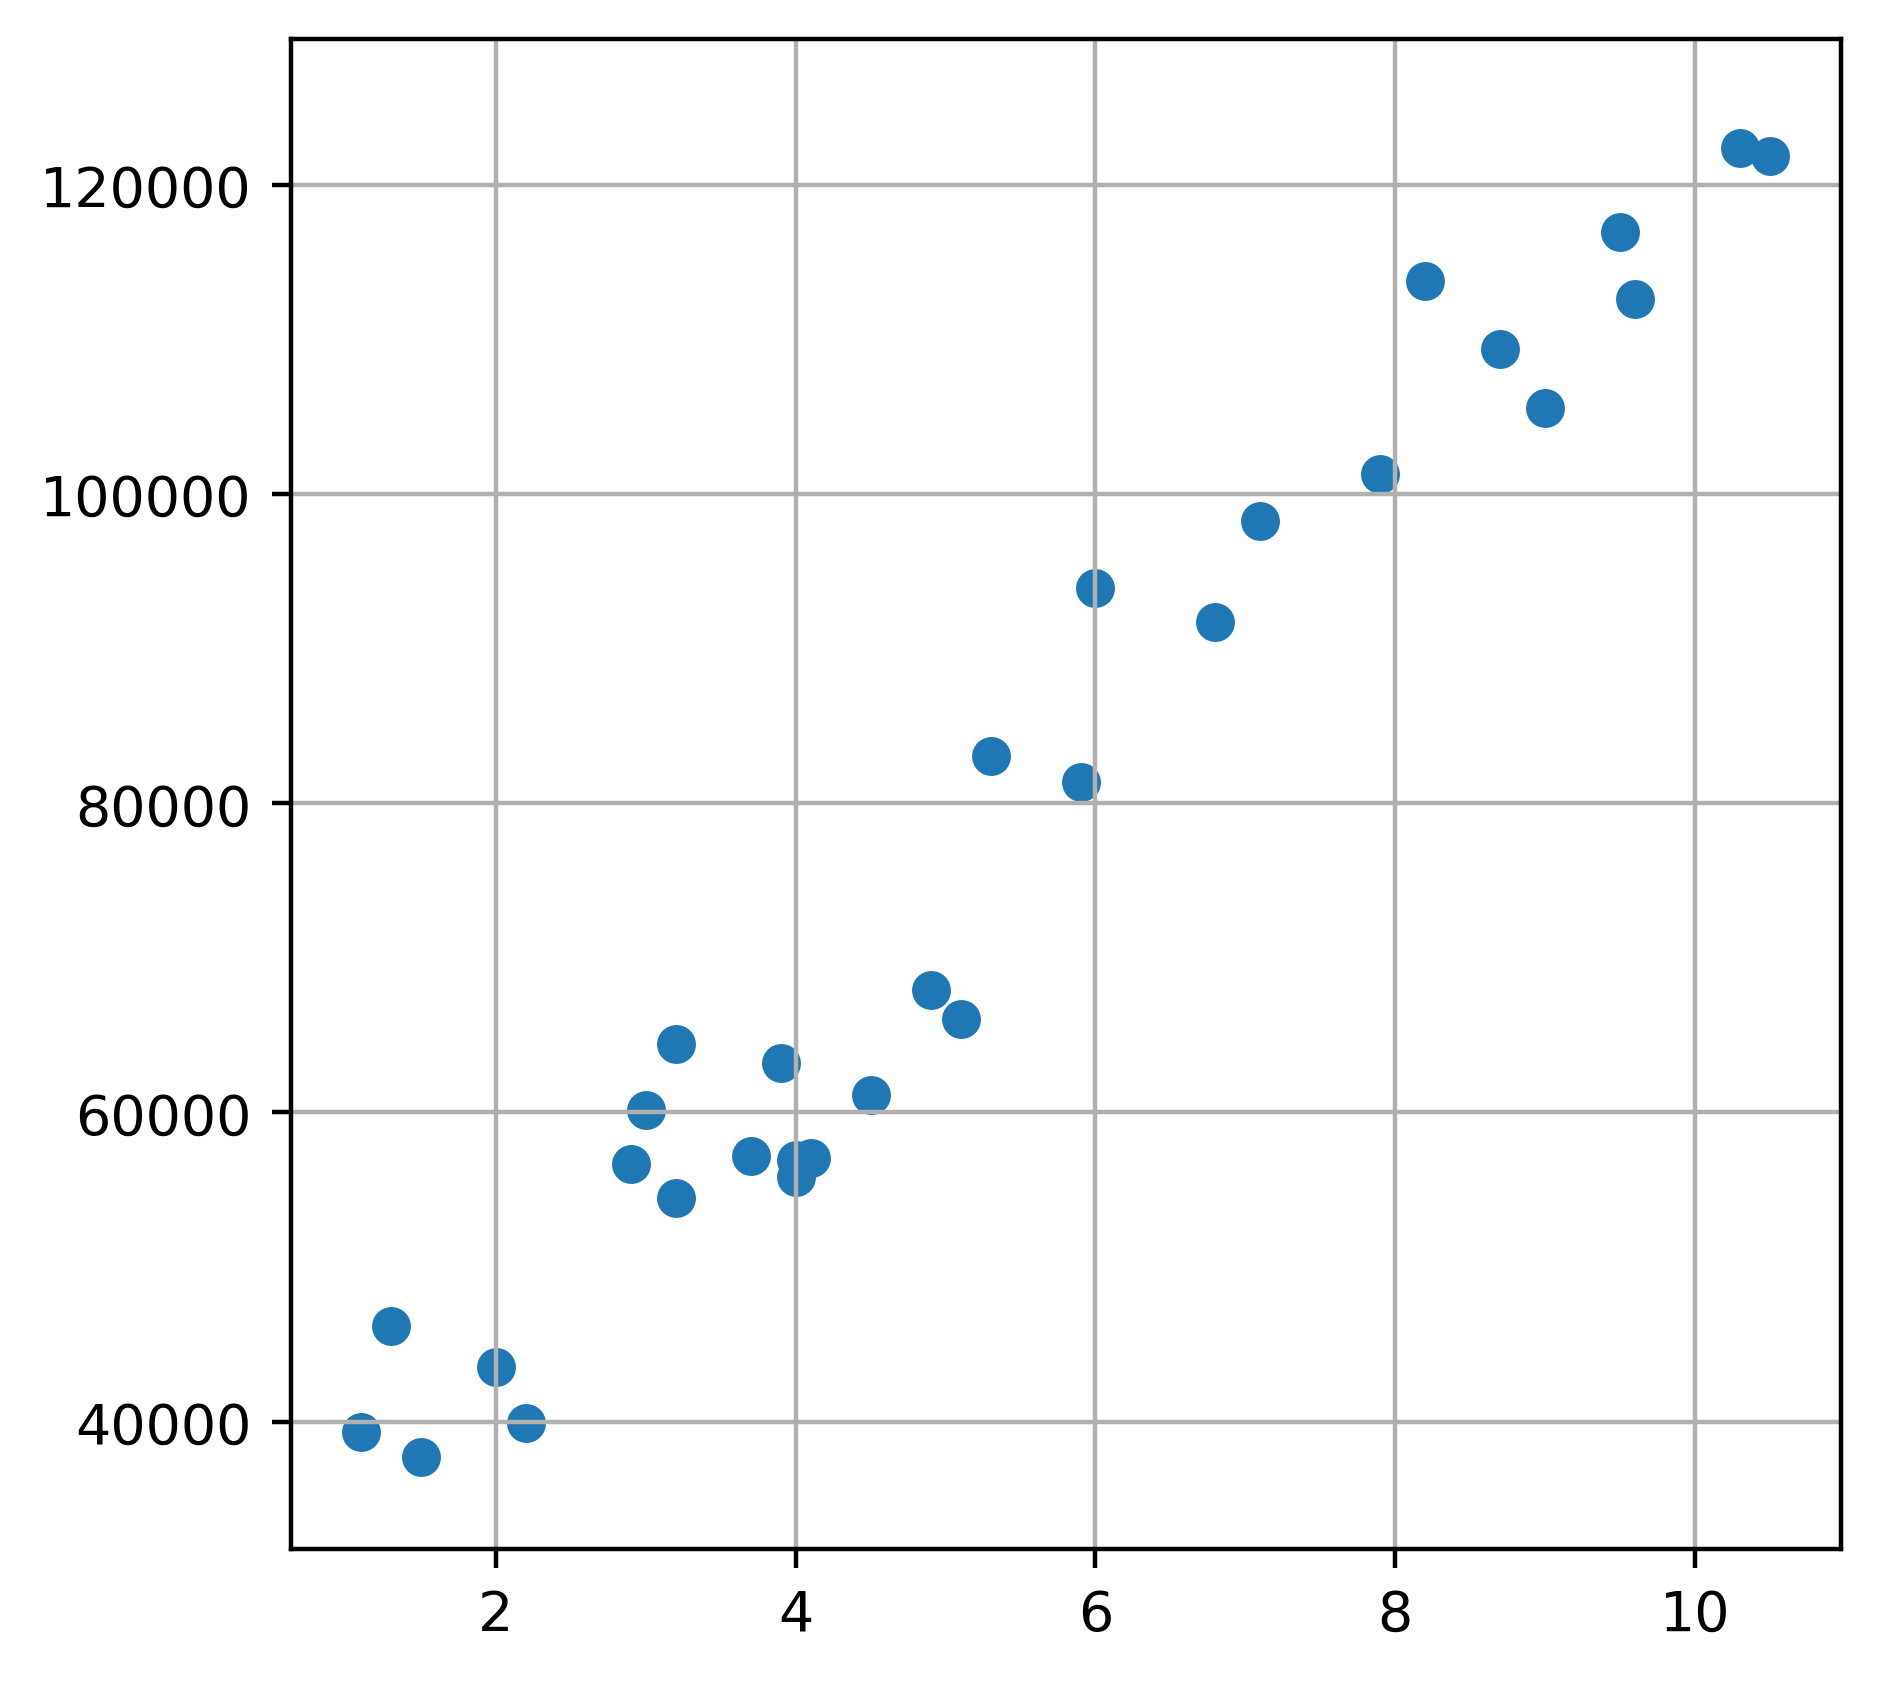

In [68]:
regressor.visualize()

# Probem 3
## 3.1 Lecture Requirement

Find or create a meme about machine learning and explain it. It must be unique per individual.
